# SKORUZ INTERNSHIP CODING COMPETITION
   Presented by Asapanna Rakesh, 25th Feb 2019

**

# Things to take care of

* #### Problem Definition
* #### Tools used
* #### Loading Datasets
* #### EDA
* #### Feature Processing and Generation
* #### Model Selection and Application
* #### Validation
* #### Metric Optimisation

## PROBLEM DEFINITION 

### 1.1. Business Objective :
        To identify which customers will make a specific transaction 
        in the future, irrespective of the amount of money transacted.


### 1.2. Type of Problem :
        Binary Classification

### 1.3. Metric used for scoring :


        Receiver Operating Characteristic curve or ROC curve.

### Tools Used : Importing Libraries

In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import gc
import os
import logging
import datetime
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lgb
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold
warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['sample_submission.csv', 'test.csv', 'train.csv']


# EXPLORATION OF DATA!

### Data Collection | Data Cleaning | Data Visualisation | Data Preprocessing 

## LOADING DATASETS

In [27]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

**Let's look how train data set looks like and compare it with train dataset**

In [28]:
#starting five rows
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,...,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,...,29.4846,5.8683,3.8208,15.8348,-5.0121,15.1345,3.2003,9.3192,3.8821,5.7999,5.5378,5.0988,22.0330,5.5134,30.2645,10.4968,-7.2352,16.5721,-7.3477,11.0752,-5.5937,9.4878,-14.9100,9.4245,22.5441,-4.8622,7.6543,-15.9319,13.3175,-0.3566,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,-0.3249,-11.2648,14.1929,7.3124,7.5244,14.6472,7.6782,-1.7395,4.7011,20.4775,17.7559,18.1377,1.2145,3.5137,5.6777,13.2177,-7.9940,-2.9029,5.8463,6.1439,-11.1025,12.4858,-2.2871,19.0422,11.0449,4.1087,4.6974,6.9346,...,13.2070,5.8442,4.7086,5.7141,-1.0410,20.5092,3.2790,-5.5952,7.3176,5.7690,-7.0927,-3.9116,7.2569,-5.8234,25.6820,10.9202,-0.3104,8.8438,-9.7009,2.4013,-4.2935,9.3908,-13.2648,3.1545,23.0866,-5.3000,5.3745,-6.2660,10.1934,-0.8417,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,2.3061,2.8102,13.8463,11.9704,6.4569,14.8372,10.7430,-0.4299,15.9426,13.7257,20.3010,12.5579,6.8202,2.7229,12.1354,13.7367,0.8135,-0.9059,5.9070,2.8407,-15.2398,10.4407,-2.5731,6.1796,10.6093,-5.9158,8.1723,2.8521,...,31.8833,5.9684,7.2084,3.8899,-11.0882,17.2502,2.5881,-2.7018,0.5641,5.3430,-7.1541,-6.1920,18.2366,11.7134,14.7483,8.1013,11.8771,13.9552,-10.4701,5.6961,-3.7546,8.4117,1.8986,7.2601,-0.4639,-0.0498,7.9336,-12.8279,12.4124,1.8489,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,-9.4458,-12.1419,13.8481,7.8895,7.7894,15.0553,8.4871,-3.0680,6.5263,11.3152,21.4246,18.9608,10.1102,2.7142,14.2080,13.5433,3.1736,-3.3423,5.9015,7.9352,-3.1582,9.4668,-0.0083,19.3239,12.4057,0.6329,2.7922,5.8184,...,33.5107,5.6953,5.4663,18.2201,6.5769,21.2607,3.2304,-1.7759,3.1283,5.5518,1.4493,-2.6627,19.8056,2.3705,18.4685,16.3309,-3.3456,13.5261,1.7189,5.1743,-7.6938,9.7685,4.8910,12.2198,11.8503,-7.8931,6.4209,5.9270,16.0201,-0.2829,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [29]:
#ending five rows
train.tail()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,-0.6209,5.6669,3.7574,-9.5348,13.9860,5.2982,8.2705,14.1527,7.4540,-5.0105,12.0465,8.6349,9.9137,25.1376,1.0914,3.2326,7.7802,13.9939,2.9085,0.1005,4.2369,7.5665,-9.2149,9.5746,1.4012,7.4211,11.0075,7.8080,4.5567,4.9861,...,35.4923,5.5477,7.4244,12.5459,-6.7840,31.1895,2.6529,-11.1867,9.8865,5.4730,-5.3880,-0.4698,24.4025,-5.4493,11.3529,7.7075,-5.0491,13.0756,15.8271,3.3580,-14.3371,10.4421,7.6530,9.4585,22.7783,-4.0305,4.2233,-6.3906,13.5058,-0.4594,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,-3.6797,6.0019,6.5576,-11.8776,14.4131,3.3087,3.5800,14.1597,7.5191,-8.8715,17.9467,17.0237,6.6459,18.2345,0.8982,2.2532,15.4977,13.3282,5.2281,-3.7424,5.5144,5.7148,-13.7470,7.4369,1.3041,12.7552,12.5362,-1.1002,2.4370,6.2631,...,35.1445,5.5375,5.6397,17.0598,-9.7142,15.5117,3.3696,-17.1855,2.8292,5.2606,2.6836,5.8767,25.1262,7.3478,27.1264,11.8542,9.7999,11.1395,-3.2870,0.4285,2.5058,10.0339,9.1610,9.4318,13.4913,4.6247,6.2906,-17.8522,18.6751,-0.1162,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,0.1202,6.1629,4.4004,-0.4651,13.8775,9.7414,10.9044,14.5597,9.6214,-1.6429,23.1127,12.1517,16.2577,3.1453,3.1008,2.1497,10.2715,13.5637,4.9473,-0.9905,6.2801,9.4902,-12.8549,11.0403,1.4306,13.8533,11.7484,6.8969,6.4162,3.4246,...,19.9293,5.3427,5.4776,13.1202,5.3500,31.7346,3.1693,-19.4779,6.8053,5.6281,-0.8774,-8.9508,17.4931,-1.6530,32.0032,12.5749,5.8756,8.8059,-10.6367,5.4401,-12.7967,8.7990,0.7021,14.9744,18.9211,0.3016,11.2869,-6.3741,12.9726,2.3425,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,-2.1926,8.7542,1.4245,0.7086,14.2110,6.5641,7.6177,13.8771,9.0479,-11.8164,14.0831,-2.0345,18.3863,3.0911,5.5803,3.7091,12.8219,13.8866,-3.3859,-0.4440,5.4817,4.0902,-7.7085,10.3952,2.5739,17.8529,11.3433,5.0534,-3.0055,3.9433,...,40.3378,5.5357,4.6151,8.5910,-12.6998,25.8578,2.2346,-6.4988,2.6702,5.3868,-7.1875,8.1477,22.4362,-2.5914,8.8704,11.6621,7.4904,8.1808,-11.4177,2.8379,3.8748,8.7410,8.9998,16.4058,11.3244,-2.1751,12.4735,-18.3932,12.6337,0.3243,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001
199999,train_199999,0,10.8762,-5.7105,12.1183,8.0328,11.5577,0.3488,5.2839,15.2058,-0.4541,9.3688,-7.3826,-8.7049,14.2486,15.0849,5.2313,14.3572,12.5523,-6.5066,11.3592,11.4779,15.4997,3.8474,2.4381,2.8295,10.6681,13.7167,-7.7771,-2.7798,6.2885,6.0089,2.1547,10.8181,-0.2712,12.5254,11.6304,-1.4949,7.9509,2.2480,...,15.9041,5.3187,6.2987,13.0729,-4.2045,19.2141,3.2902,-1.2175,4.1583,5.7675,5.7719,-1.2139,21.8496,-3.5368,25.9094,11.7673,1.9765,15.9218,3.9350,4.3993,-10.3268,10.5200,9.9587,11.9242,7.0626,-6.5429,10.5947,-3.8827,16.3552,1.7535,8.9842,1.6893,0.1276,0.3766,15.2101,-2.4907,-2.2342,8.1857,12.1284,0.1385


In [30]:
#number of rows, columns and data types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [31]:
#numerical description of train dataset
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,7.567236,0.394340,-3.245596,14.023978,8.530232,7.537606,14.573126,9.333264,-5.696731,15.244013,12.438567,13.290894,17.257883,4.305430,3.019540,10.584400,13.667496,-4.055133,-1.137908,5.532980,5.053874,-7.687740,10.393046,-0.512886,14.774147,11.434250,3.842499,2.187230,5.868899,10.642131,...,24.259300,5.633293,5.362896,11.002170,-2.871906,19.315753,2.963335,-4.151155,4.937124,5.636008,-0.004962,-0.831777,19.817094,-0.677967,20.210677,11.640613,-2.799585,11.882933,-1.014064,2.591444,-2.741666,10.085518,0.719109,8.769088,12.756676,-3.983261,8.970274,-10.335043,15.377174,0.746072,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,1.235070,5.500793,5.970253,0.190059,4.639536,2.247908,0.411711,2.557421,6.712612,7.851370,7.996694,5.876254,8.196564,2.847958,0.526893,3.777245,0.285535,5.922210,1.523714,0.783367,2.615942,7.965198,2.159891,2.587830,4.322325,0.541614,5.179559,3.119978,2.249730,4.278903,...,10.880263,0.217938,1.419612,5.262056,5.457784,5.024182,0.369684,7.798020,3.105986,0.369437,4.424621,5.378008,8.674171,5.966674,7.136427,2.892167,7.513939,2.628895,8.579810,2.798956,5.261243,1.371862,8.963434,4.474924,9.318280,4.725167,3.189759,11.574708,3.944604,0.976348,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,3.970500,-20.731300,-26.095000,13.434600,-6.011100,1.013300,13.076900,0.635100,-33.380200,-10.664200,-12.402500,-5.432200,-10.089000,-5.322500,1.209800,-0.678400,12.720000,-24.243100,-6.166800,2.089600,-4.787200,-34.798400,2.140600,-8.986100,1.508500,9.816900,-16.513600,-8.095100,-1.183400,-6.337100,...,-7.452200,4.852600,0.623100,-6.531700,-19.997700,3.816700,1.851200,-35.969500,-5.250200,4.258800,-14.506000,-22.479300,-11.453300,-22.748700,-2.995300,3.241500,-29.116500,4.952100,-29.273400,-7.856100,-22.037400,5.416500,-26.001100,-4.808200,-18.489700,-22.583300,-3.022300,-47.753600,4.412300,-2.554300,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.26

In [32]:
test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,-2.0248,-4.3554,13.9696,0.3458,7.5408,14.5001,7.7028,-19.0919,15.5806,16.1763,3.7088,18.8064,1.5899,3.0654,6.4509,14.1192,-9.4902,-2.1917,5.7107,3.7864,-1.7981,9.2645,2.0657,12.7753,11.3334,8.1462,-0.0610,3.5331,9.7804,...,5.9232,5.4113,3.8302,5.7380,-8.6105,22.9530,2.5531,-0.2836,4.3416,5.1855,4.2603,1.6779,29.0849,8.4685,18.1317,12.2818,-0.6912,10.2226,-5.5579,2.2926,-4.5358,10.3903,-15.4937,3.9697,31.3521,-1.1651,9.2874,-23.5705,13.2643,1.6591,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,-1.3809,-0.3310,14.1129,2.5667,5.4988,14.1853,7.0196,4.6564,29.1609,0.0910,12.1469,3.1389,5.2578,2.4228,16.2064,13.5023,-5.2341,-3.6648,5.7080,2.9965,-10.4720,11.4938,-0.9660,15.3445,10.6361,0.8966,6.7428,2.3421,12.8678,...,30.9641,5.6723,3.6873,13.0429,-10.6572,15.5134,3.2185,9.0535,7.0535,5.3924,-0.7720,-8.1783,29.9227,-5.6274,10.5018,9.6083,-0.4935,8.1696,-4.3605,5.2110,0.4087,12.0030,-10.3812,5.8496,25.1958,-8.8468,11.8263,-8.7112,15.9072,0.9812,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,8.3442,-4.7057,-3.0422,13.6751,3.8183,10.8535,14.2126,9.8837,2.6541,21.2181,20.8163,12.4666,12.3696,4.7473,2.7936,5.2189,13.5670,-15.4246,-0.1655,7.2633,3.4310,-9.1508,9.7320,3.1062,22.3076,11.9593,9.9255,4.0702,4.9934,8.0667,...,39.3654,5.5228,3.3159,4.3324,-0.5382,13.3009,3.1243,-4.1731,1.2330,6.1513,-0.0391,1.4950,16.8874,-2.9787,27.4035,15.8819,-10.9660,15.6415,-9.4056,4.4611,-3.0835,8.5549,-2.8517,13.4770,24.4721,-3.4824,4.9178,-2.0720,11.5390,1.1821,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,7.4578,0.0095,-5.0659,14.0526,13.5010,8.7660,14.7352,10.0383,-15.3508,2.1273,21.4797,14.5372,12.5527,2.9707,4.2398,13.7796,14.1408,1.0061,-1.3479,5.2570,6.5911,6.2161,9.5540,2.3628,10.2124,10.8047,-2.5588,6.0720,3.2613,16.5632,...,19.7251,5.3882,3.6775,7.4753,-11.0780,24.8712,2.6415,2.2673,7.2788,5.6406,7.2048,3.4504,2.4130,11.1674,14.5499,10.6151,-5.7922,13.9407,7.1078,1.1019,9.4590,9.8243,5.9917,5.1634,8.1154,3.6638,3.3102,-19.7819,13.4499,1.3104,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,7.1437,5.1025,-3.2827,14.1013,8.9672,4.7276,14.5811,11.8615,3.1480,18.0126,13.8006,1.6026,16.3059,6.7954,3.6015,13.6569,13.8807,8.6228,-2.2654,5.2255,7.0165,-15.6961,10.6239,-4.7674,17.5447,11.8668,3.0154,4.2546,6.7601,5.9613,...,22.8700,5.6688,6.1159,13.2433,-11.9785,26.2040,3.2348,-5.5775,5.7036,6.1717,-1.6039,-2.4866,17.2728,2.3640,14.0037,12.9165,-12.0311,10.1161,-8.7562,6.0889,-1.3620,10.3559,-7.4915,9.4588,3.9829,5.8580,8.3635,-24.8254,11.4928,1.6321,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [33]:
test.tail()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
199995,test_199995,13.1678,1.0136,10.4333,6.7997,8.5974,-4.1641,4.8579,14.7625,-2.7239,6.9937,2.6802,6.1565,14.3201,17.4594,5.3712,14.8984,5.8064,-10.0334,16.4220,30.7786,22.7696,9.8526,4.0207,3.8469,13.1617,13.2522,-12.4547,-1.9127,5.3696,6.9779,-17.9649,10.7856,0.2776,5.8071,10.4332,8.6681,0.9646,11.2181,11.8660,...,21.4193,5.3269,6.8510,15.7062,-3.0267,21.8848,3.5995,-2.5442,3.7888,6.6096,-6.3101,2.2246,29.0310,5.0331,26.2206,14.3811,-4.5834,9.8823,12.3426,7.3865,-11.8810,10.4412,-0.9849,10.9760,12.3183,-2.7719,5.8820,8.5245,17.5356,1.0903,2.0544,9.6849,4.6734,-1.3660,12.8721,1.2013,-4.6195,9.1568,18.2102,4.8801
199996,test_199996,9.7171,-9.1462,7.3443,9.1421,12.8936,3.0191,5.6888,18.8862,5.0915,6.3545,3.2618,-2.0445,13.8246,6.6547,5.0309,14.1999,8.5685,3.8190,11.4428,19.6761,22.4473,16.6921,5.5064,3.6160,10.4145,13.5557,0.0592,-1.8571,6.3351,6.4782,-15.0057,11.0107,1.1463,11.1037,11.7266,2.2244,1.3367,3.8213,2.7258,...,25.5856,5.6828,3.9202,10.5955,-2.9063,18.2834,3.0946,-13.0401,10.6693,5.4541,0.0289,1.5879,8.3102,6.5891,20.1379,14.4782,-7.6099,8.8498,-11.0107,-1.7399,-1.4862,10.0511,-15.1250,7.5211,26.2435,-0.8879,6.4135,-1.1382,15.4816,1.7106,5.0071,6.6548,1.8197,2.4104,18.9037,-0.9337,2.9995,9.1112,18.1740,-20.7689
199997,test_199997,11.6360,2.2769,11.2074,7.7649,12.6796,11.3224,5.3883,18.3794,1.6603,5.7341,9.8596,-0.3412,14.0675,13.9975,6.2574,15.1456,8.1250,-7.3642,15.4767,15.9472,16.6580,16.0286,0.6066,3.5773,4.4758,13.8995,-9.1787,-2.3696,4.6504,7.7074,-14.7738,9.6374,-0.4069,11.3680,11.3627,6.7611,7.6036,8.1942,6.4839,...,31.7520,5.7419,7.3339,9.1077,-1.9905,11.9434,3.2239,-9.1386,4.1733,5.9515,-5.8944,2.6633,30.7599,-13.1990,18.9432,15.5096,-6.8353,11.1724,-0.5545,-2.9957,-2.1730,11.1961,13.0570,17.0153,1.7004,-7.2363,8.1679,-15.7536,16.3071,-1.0926,5.1536,2.6498,2.4937,-0.0637,20.0609,-1.1742,-4.1524,9.1933,11.7905,-22.2762
199998,test_199998,13.5745,-0.5134,13.6584,7.4855,11.2241,-11.3037,4.1959,16.8280,5.3208,8.9032,5.5000,-13.1346,14.3051,4.2644,11.1258,14.7810,10.7184,-11.1223,14.3151,11.8348,12.2356,20.9599,1.1101,3.0801,6.2626,14.0242,3.6157,-1.3483,6.5041,6.5306,-20.2249,10.7930,-5.3353,9.9596,11.4595,8.1176,2.5997,3.1370,3.5781,...,28.5510,5.6456,3.5223,7.3218,-0.4352,20.1410,3.2078,-3.3613,2.5097,5.3997,-5.8704,-0.7192,22.2659,2.2206,13.2572,9.2657,-12.6796,10.6895,-15.4493,2.5477,2.1028,11.3081,-0.9160,15.2015,-0.9905,-13.6271,11.5390,-24.8621,6.6792,0.8885,3.4259,8.5012,2.2713,5.7621,17.0056,1.1763,-2.3761,8.1079,8.7735,-0.2122
199999,test_199999,10.4664,1.8070,10.2277,6.0654,10.0258,1.0789,4.8879,14.4892,-0.5902,7.8362,8.4796,-5.8960,13.8333,2.4590,7.8881,14.8566,10.4665,-11.8235,25.2430,20.9039,19.0743,15.5896,-2.1275,2.9672,2.0289,13.9641,-2.7192,0.9102,4.1522,3.9101,-8.6119,11.5158,2.8218,11.5082,11.2149,5.4528,-0.5887,2.8780,7.0659,...,26.7010,5.8830,3.8301,15.0473,4.8121,17.1152,2.4527,-6.0539,5.3711,6.1772,0.9131,0.3922,15.0415,-1.4703,30.1926,10.3408,-5.4143,13.9104,1.6210,2.0273,-2.9853,10.4163,-12.1494,10.0160,13.3454,-8.1344,4.6123,3.4033,16.8310,0.6155,0.1398,9.2828,1.3601,4.8985,20.0926,-1.3048,-2.5981,10.3378,14.3340,-7.7094


In [34]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB


### Inference :
    Train contains the following 202 columns:

        ID_code (object)
        target (catogorical)
        200 numerical variables, named from var_0 to var_199

    Test contains the following 201 columns:

        ID_code (object)
        200 numerical variables, named from var_0 to var_199
        
     The missing 1 column in test: 
         
         target
    
        


**Outline - Numerical properties of test and train**

In [35]:
test.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,0.371335,-3.268551,14.022662,8.540872,7.532703,14.573704,9.321669,-5.70445,15.265776,12.456675,13.298428,17.230598,4.299010,3.019707,10.567479,13.666970,-3.983721,-1.129536,5.530656,5.047247,-7.687695,10.404920,-0.524830,14.762686,11.434861,3.870130,2.213288,5.875048,10.647806,0.672667,...,24.146181,5.635300,5.360975,11.026376,-2.857328,19.320760,2.962821,-4.189133,4.930356,5.633716,-0.020824,-0.805148,19.779528,-0.666240,20.264135,11.635715,-2.776134,11.864538,-0.949318,2.582604,-2.722636,10.080827,0.651432,8.768929,12.719302,-3.963045,8.978800,-10.291919,15.366094,0.755673,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,5.508661,5.961443,0.190071,4.628712,2.255257,0.411592,2.544860,6.74646,7.846983,7.989812,5.884245,8.199877,2.844023,0.527951,3.771047,0.285454,5.945853,1.524765,0.785618,2.610078,7.971581,2.156324,2.588700,4.325727,0.541040,5.170614,3.120685,2.257235,4.260820,4.078592,...,10.876184,0.217936,1.426064,5.268894,5.457937,5.039303,0.370668,7.827428,3.086443,0.365750,4.417876,5.378492,8.678024,5.987419,7.141816,2.884821,7.557001,2.626556,8.570314,2.803890,5.225554,1.369546,8.961936,4.464461,9.316889,4.724641,3.206635,11.562352,3.929227,0.976123,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,-22.672400,-25.811800,13.424500,-4.741300,0.670300,13.203400,0.314300,-28.90690,-11.324200,-12.699400,-2.634600,-9.940600,-5.164000,1.390600,-0.731300,12.749600,-24.536100,-6.040900,2.842500,-4.421500,-34.054800,1.309200,-8.209000,1.691100,9.776400,-16.923800,-10.466800,-0.885100,-5.368300,-14.083700,...,-8.925700,4.910600,0.106200,-6.093700,-21.514000,3.667300,1.813100,-37.176400,-5.405700,4.291500,-15.593200,-20.393600,-11.796600,-21.342800,-2.485400,2.951200,-29.838400,5.025300,-29.118500,-7.767400,-20.610600,5.346000,-28.092800,-5.476800,-17.011400,-22.467000,-2.303800,-47.306400,4.429100,-2.511500,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.91190

In [36]:
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,7.567236,0.394340,-3.245596,14.023978,8.530232,7.537606,14.573126,9.333264,-5.696731,15.244013,12.438567,13.290894,17.257883,4.305430,3.019540,10.584400,13.667496,-4.055133,-1.137908,5.532980,5.053874,-7.687740,10.393046,-0.512886,14.774147,11.434250,3.842499,2.187230,5.868899,10.642131,...,24.259300,5.633293,5.362896,11.002170,-2.871906,19.315753,2.963335,-4.151155,4.937124,5.636008,-0.004962,-0.831777,19.817094,-0.677967,20.210677,11.640613,-2.799585,11.882933,-1.014064,2.591444,-2.741666,10.085518,0.719109,8.769088,12.756676,-3.983261,8.970274,-10.335043,15.377174,0.746072,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,1.235070,5.500793,5.970253,0.190059,4.639536,2.247908,0.411711,2.557421,6.712612,7.851370,7.996694,5.876254,8.196564,2.847958,0.526893,3.777245,0.285535,5.922210,1.523714,0.783367,2.615942,7.965198,2.159891,2.587830,4.322325,0.541614,5.179559,3.119978,2.249730,4.278903,...,10.880263,0.217938,1.419612,5.262056,5.457784,5.024182,0.369684,7.798020,3.105986,0.369437,4.424621,5.378008,8.674171,5.966674,7.136427,2.892167,7.513939,2.628895,8.579810,2.798956,5.261243,1.371862,8.963434,4.474924,9.318280,4.725167,3.189759,11.574708,3.944604,0.976348,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,3.970500,-20.731300,-26.095000,13.434600,-6.011100,1.013300,13.076900,0.635100,-33.380200,-10.664200,-12.402500,-5.432200,-10.089000,-5.322500,1.209800,-0.678400,12.720000,-24.243100,-6.166800,2.089600,-4.787200,-34.798400,2.140600,-8.986100,1.508500,9.816900,-16.513600,-8.095100,-1.183400,-6.337100,...,-7.452200,4.852600,0.623100,-6.531700,-19.997700,3.816700,1.851200,-35.969500,-5.250200,4.258800,-14.506000,-22.479300,-11.453300,-22.748700,-2.995300,3.241500,-29.116500,4.952100,-29.273400,-7.856100,-22.037400,5.416500,-26.001100,-4.808200,-18.489700,-22.583300,-3.022300,-47.753600,4.412300,-2.554300,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.26

NameError: name 'features' is not defined

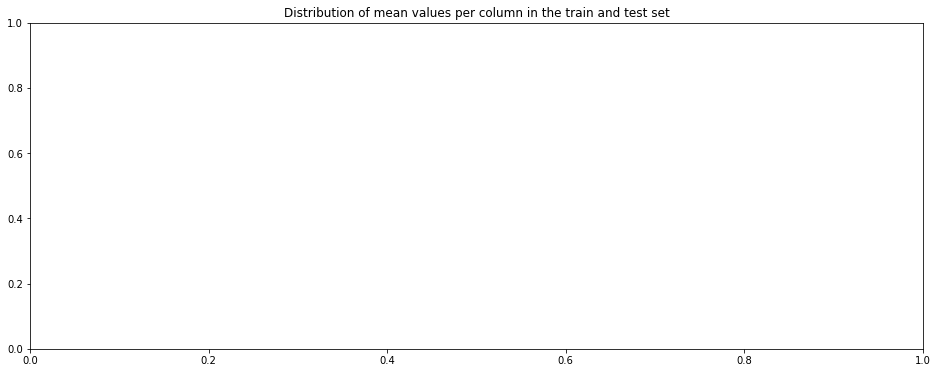

In [37]:
#Plotting Distribution of mean values per column in the two datasets - test and train

# N O T E : sometimes this code does NOT work

plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per column in the train and test set")
sns.distplot(train[features].mean(axis=0),color="magenta",kde=True,bins=120, label='train')
sns.distplot(test[features].mean(axis=0),color="darkblue", kde=True,bins=120, label='test')
plt.legend()
plt.show()

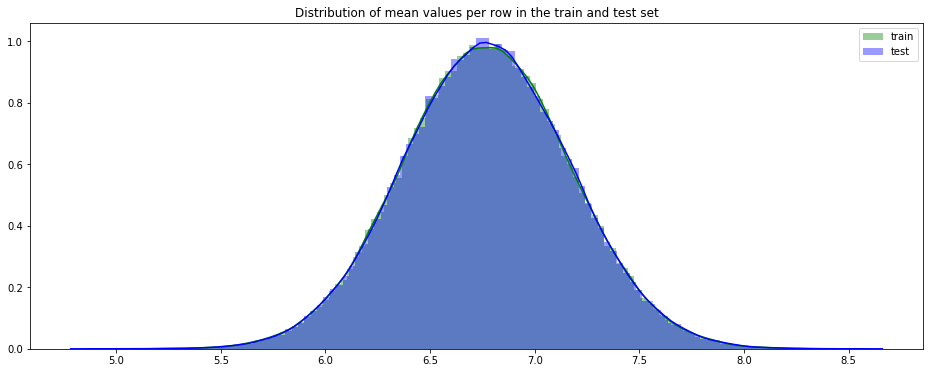

In [38]:
# Plottting distribution of mean values per row in the train and test set

plt.figure(figsize=(16,6))
features = train.columns.values[2:202]
plt.title("Distribution of mean values per row in the train and test set")
sns.distplot(train[features].mean(axis=1),color="green", kde=True,bins=120, label='train')
sns.distplot(test[features].mean(axis=1),color="blue", kde=True,bins=120, label='test')
plt.legend()
plt.show()

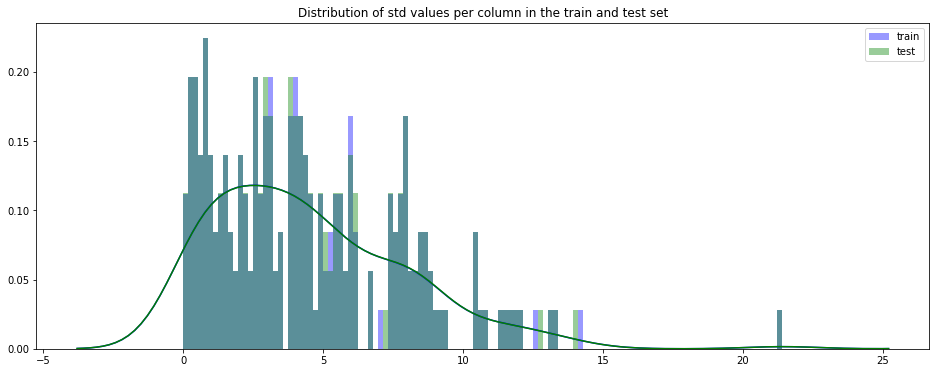

In [39]:
#plotting distribution of std values per column in the train and test set

plt.figure(figsize=(16,6))
plt.title("Distribution of std values per column in the train and test set")
sns.distplot(train[features].std(axis=0),color="blue",kde=True,bins=120, label='train')
sns.distplot(test[features].std(axis=0),color="green", kde=True,bins=120, label='test')
plt.legend(); plt.show()

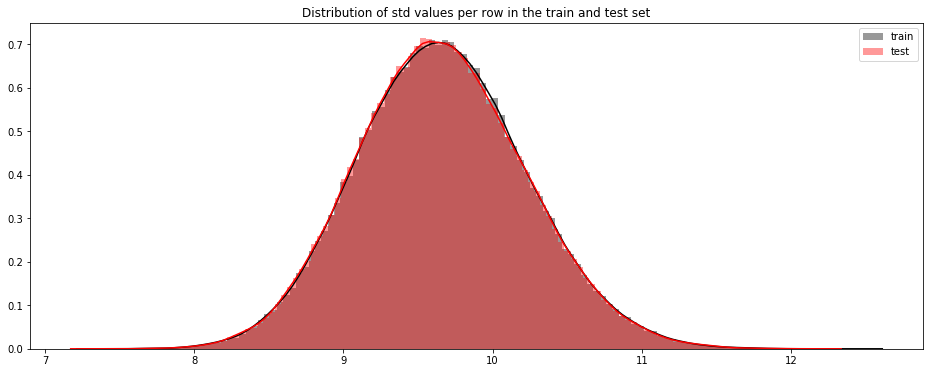

In [40]:
#Plotting distribution of std values per row in the train and test set

plt.figure(figsize=(16,6))
plt.title("Distribution of std values per row in the train and test set")
sns.distplot(train[features].std(axis=1),color="black", kde=True,bins=120, label='train')
sns.distplot(test[features].std(axis=1),color="red", kde=True,bins=120, label='test')
plt.legend();plt.show()

<Figure size 432x288 with 0 Axes>

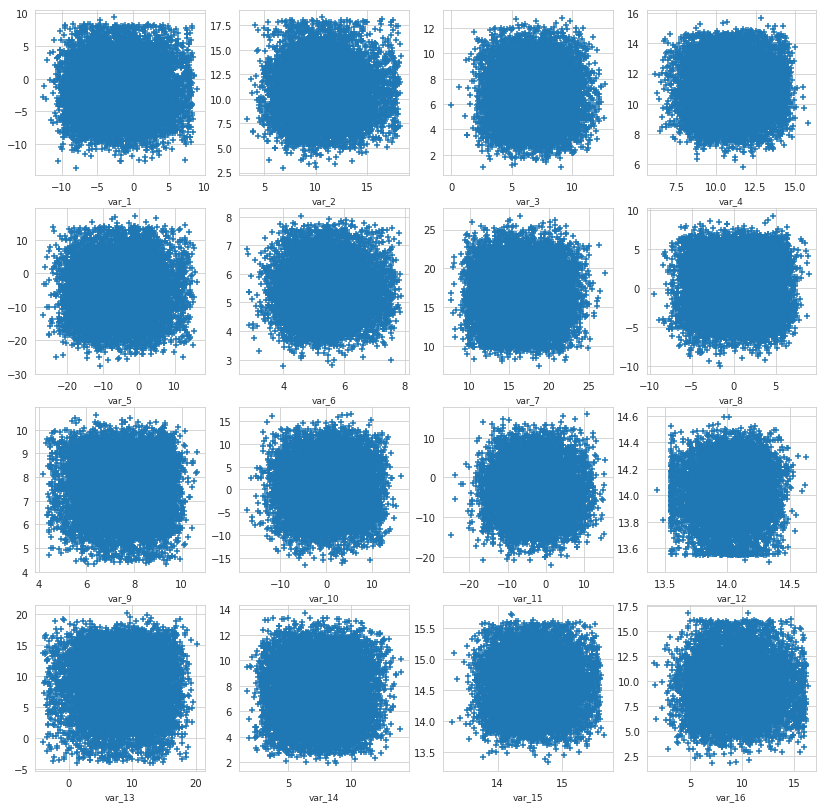

In [41]:
#Scatter plot for first 15 columns of tests and train to see their correlation

def plot_feature_scatter(df1, df2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(4,4,figsize=(14,14))

    for feature in features:
        i += 1
        plt.subplot(4,4,i)
        plt.scatter(df1[feature], df2[feature], marker='+')
        plt.xlabel(feature, fontsize=9)
    plt.show();
    
plot_feature_scatter(train[::20],test[::20], test.columns[2:18])


**Inference :**
    
    1. Data set is anonamized and it is difficult to get the domain knowledge.
          So, we may do following things :
               1.1. Guess the type o data (already done above)
               1.2. Explore individual features
               1.3. Explore different pair and group relations between different features 
    2. For both train and test variable data - Standard deviation is relatively very large.
    3. High correlation between min, max, mean, sdt values for train and test datasets.
    4. Large range of distribution for mean values
    5. The number of values in train and test set is the same. 

In [42]:
#exploring features :

#plt.figure(figsize=(26, 24))
#for i, col in enumerate(list(train.columns)[:24]):
#    plt.subplot(6, 4, i + 1)
#    plt.hist(train[col])
#    plt.title(col)

**We calculate now the correlations between the features in train set.
The following table shows the first 10 the least correlated features.**

In [43]:
correlations = train[features].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]

In [44]:
#top most co related features:
correlations.head(10)

,level_0,level_1,0
0,var_75,var_191,2.703975e-08
1,var_191,var_75,2.703975e-08
2,var_173,var_6,5.942735e-08
3,var_6,var_173,5.942735e-08
4,var_126,var_109,1.313947e-07
5,var_109,var_126,1.313947e-07
6,var_144,var_27,1.772502e-07
7,var_27,var_144,1.772502e-07
8,var_177,var_100,3.116544e-07
9,var_100,var_177,3.116544e-07


In [45]:
#least corelated features
correlations.tail(10)

,level_0,level_1,0
39790,var_183,var_189,0.009359
39791,var_189,var_183,0.009359
39792,var_174,var_81,0.009490
39793,var_81,var_174,0.009490
39794,var_81,var_165,0.009714
39795,var_165,var_81,0.009714
39796,var_53,var_148,0.009788
39797,var_148,var_53,0.009788
39798,var_26,var_139,0.009844
39799,var_139,var_26,0.009844


**Inference : We can see that all features have a low correlation with target. So we have no highly correlated features which we could drop, on the other hand we could drop some columns with have little correlation with the target.**

**Checking if any missing values**

In [46]:
train.isnull().any().any()

False

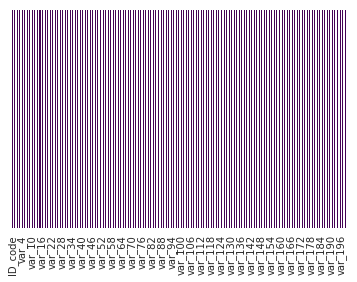

In [47]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Inference : There is no empty or missing values

## Duplicate values

**Let's now check how many duplicate values exists per columns.**

In [48]:
#checking duplicate values
features = train.columns.values[2:202]
unique_max_train = []
unique_max_test = []
for feature in features:
    values = train[feature].value_counts()
    unique_max_train.append([feature, values.max(), values.idxmax()])
    values = test[feature].value_counts()
    unique_max_test.append([feature, values.max(), values.idxmax()])

In [49]:
np.transpose((pd.DataFrame(unique_max_train, columns=['Feature', 'Max duplicates', 'Value'])).\
            sort_values(by = 'Max duplicates', ascending=False).head(15))

,68,108,126,12,91,103,148,71,161,25,125,169,166,133,43
Feature,var_68,var_108,var_126,var_12,var_91,var_103,var_148,var_71,var_161,var_25,var_125,var_169,var_166,var_133,var_43
Max duplicates,1084,313,305,203,66,61,59,54,52,41,40,39,39,39,39
Value,5.0214,14.1999,11.5356,13.5545,6.9785,1.6662,4.0456,0.7031,5.7688,13.6723,12.5159,5.6941,2.7306,6.8632,11.4522


In [50]:
np.transpose((pd.DataFrame(unique_max_test, columns=['Feature', 'Max duplicates', 'Value'])).\
            sort_values(by = 'Max duplicates', ascending=False).head(15))

,68,126,108,12,91,103,148,161,25,71,43,166,125,169,133
Feature,var_68,var_126,var_108,var_12,var_91,var_103,var_148,var_161,var_25,var_71,var_43,var_166,var_125,var_169,var_133
Max duplicates,1104,307,302,188,86,78,74,69,60,60,58,53,53,51,50
Value,5.0197,11.5357,14.1999,13.5546,6.9939,1.4659,4.0004,5.7114,13.5965,0.5389,11.5738,2.8446,12.2189,5.8455,6.6873


In [51]:
nunique = train.nunique(dropna=False)
nunique.sort_values().head(20)

target         2
var_68       451
var_91      7962
var_108     8525
var_103     9376
var_12      9561
var_148    10608
var_161    11071
var_71     13527
var_25     14853
var_43     15188
var_125    16059
var_166    17902
var_169    18242
var_133    19236
var_15     19810
var_131    21464
var_23     24913
var_34     25164
var_93     26708
dtype: int64

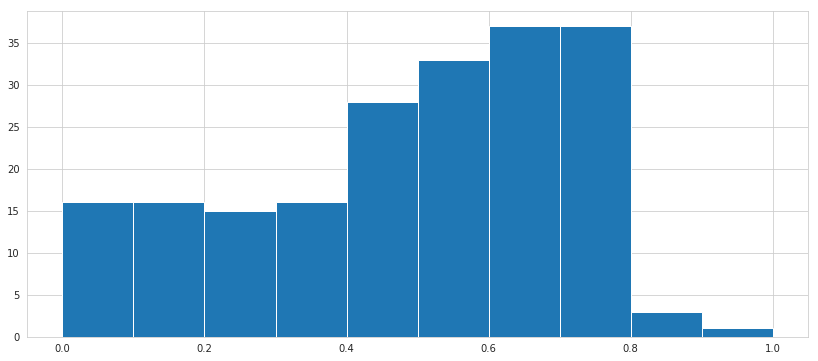

In [52]:
plt.figure(figsize=(14,6))
_ = plt.hist(nunique.astype(float)/train.shape[0], bins=10)
#normalized graph

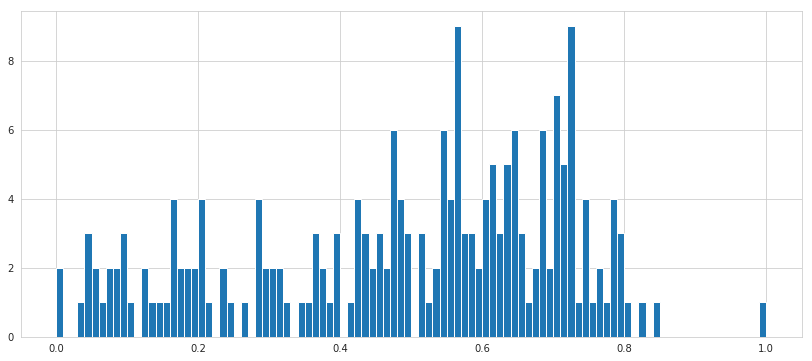

In [53]:
plt.figure(figsize=(14,6))
_ = plt.hist(nunique.astype(float)/train.shape[0], bins=100)

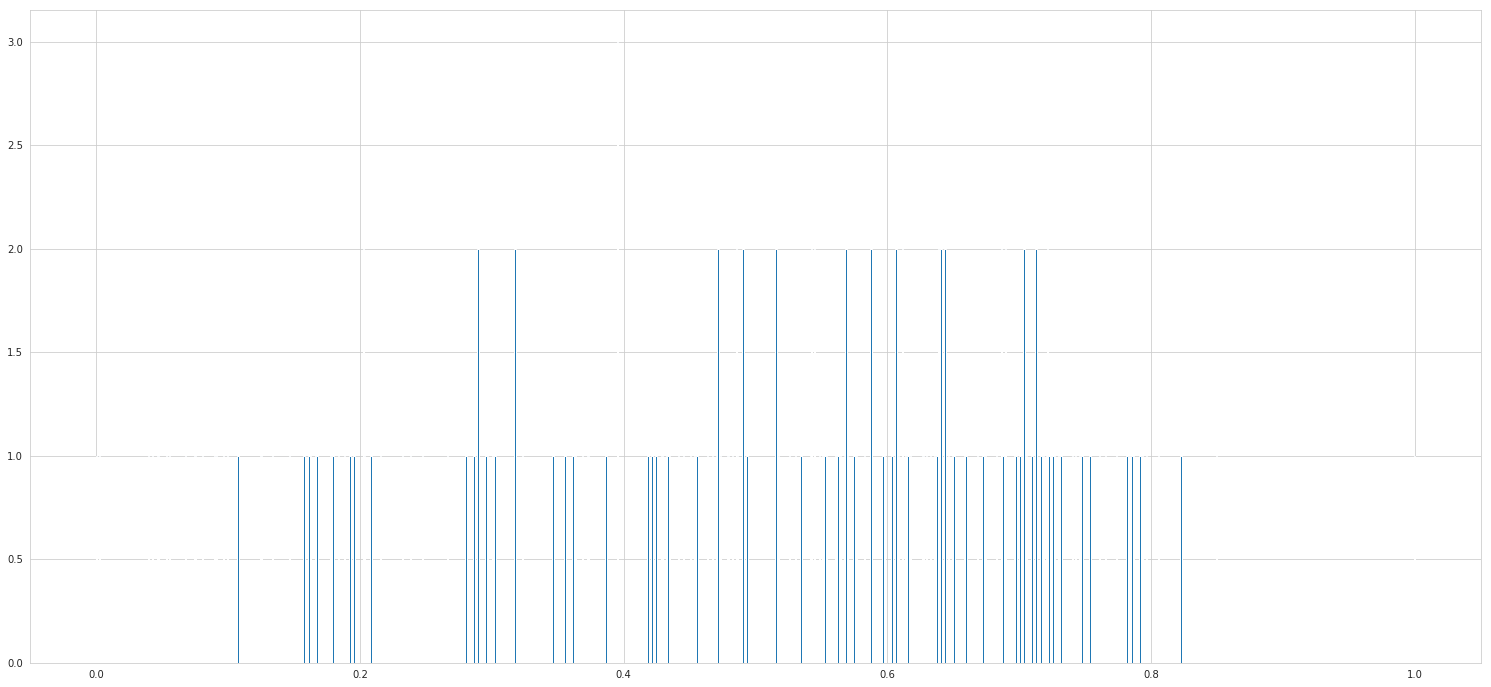

In [54]:
plt.figure(figsize=(26,12))
_ = plt.hist(nunique.astype(float)/train.shape[0], bins=1000)

In [55]:
mask = (nunique.astype(float)/train.shape[0] < 0.2)
train.loc[:, mask].head(20)

,target,var_6,var_12,var_15,var_23,var_25,var_28,var_34,var_42,var_43,var_50,var_53,var_57,var_59,var_68,var_71,var_91,var_93,var_95,var_98,var_103,var_105,var_108,var_125,var_126,var_130,var_131,var_133,var_148,var_161,var_166,var_169
0,0,5.1187,14.0137,14.5691,2.4716,13.4325,4.9306,11.1920,11.5767,12.0446,12.9194,5.1736,5.3822,10.1166,5.0109,0.5663,6.7806,9.9913,0.1812,2.1743,1.4403,6.0454,14.1104,12.0039,13.8571,12.8287,0.3587,6.5674,4.0288,5.3133,2.7004,5.4879
1,0,5.6208,14.0239,13.7003,3.3716,13.8910,5.0464,11.3702,9.8775,11.7842,11.8343,6.6885,7.0118,8.8682,5.0220,0.5134,6.8852,10.9631,-1.2722,1.8944,1.7093,2.6227,13.9550,12.5942,14.5697,12.4205,-0.1780,7.0513,4.2578,5.8683,3.2003,5.7999
2,0,6.9427,14.1929,14.6472,3.5137,13.2177,5.8463,11.0449,11.5283,12.0406,12.9143,6.4059,5.8200,9.1854,5.0228,0.8520,7.0883,10.5080,0.2647,1.6981,1.3854,3.9995,14.1963,12.4653,14.1978,11.5419,0.0975,6.6231,4.0714,5.8442,3.2790,5.7690
3,0,5.8428,13.8463,14.8372,2.7229,13.7367,5.9070,10.6093,11.7770,11.2834,12.6832,5.2091,6.5850,9.4638,5.0220,0.2500,7.0364,10.7795,-1.0930,2.8344,1.3512,4.2835,14.3256,12.3441,12.5431,14.3003,1.0486,7.1954,3.7613,5.9684,2.5881,5.3430
4,0,5.9405,13.8481,15.0553,2.7142,13.5433,5.9015,12.4057,11.9171,11.5111,13.3273,5.7555,6.1812,9.2048,5.0301,0.7737,7.0065,10.4316,0.0213,1.6844,1.6940,5.1934,14.0837,12.1316,12.5815,11.4266,0.9442,6.6173,3.7574,5.6953,3.2304,5.5518
5,0,4.5322,13.6380,14.9894,3.8663,13.9427,5.1494,10.7209,11.5015,11.6891,13.2355,5.2399,5.9587,8.2253,5.0110,0.6780,6.9204,10.5375,1.1735,0.9217,1.6012,4.2972,14.1434,12.3697,13.0031,12.7212,0.5762,6.6143,3.9799,5.3739,2.8455,5.9714
6,0,6.1961,14.1629,14.3363,3.9769,13.3600,5.6452,11.1510,10.6889,10.9480,12.9840,5.2735,6.6104,7.9378,5.0178,0.6386,7.0140,10.4502,0.6137,2.4715,1.8554,4.3055,14.4272,11.8274,12.1880,11.9410,0.5405,7.4506,3.8912,5.5552,3.0298,6.1887
7,0,5.6890,14.2919,14.2459,3.1711,13.3250,5.4501,11.5257,11.2721,11.2407,13.7538,6.6503,6.5482,8.0006,5.0128,1.0085,6.8082,11.2303,-0.6602,2.0848,1.4998,4.1641,14.2331,11.9988,13.4588,11.3924,0.4158,7.0754,4.1435,5.4098,2.6085,5.2273
8,0,4.4514,14.0654,14.8757,2.6182,13.7929,5.9575,12.2897,11.6615,11.7713,12.4808,7.3927,6.4755,9.1362,5.0157,1.1193,6.7557,10.6106,0.3753,1.7439,1.8678,4.6365,14.3644,12.8652,12.7353,10.4515,1.1093,6.8742,4.0489,5.7888,2.6893,5.9018
9,0,6.0637,13.9639,15.2659,3.2978,13.3778,6.1120,10.9237,11.9304,11.9698,12.7260,5.9517,7.3065,8.3434,5.0257,0.9713,7.1458,9.9112,-0.3913,2.2221,1.4879,4.8005,14.0859,12.4578,14.1408,10.8094,0.3322,6.9338,3.8400,5.4536,2.4139,5.8540


**Inference : Huge number of values are distributed among a few numerical values**

### Outline - The column to be classified

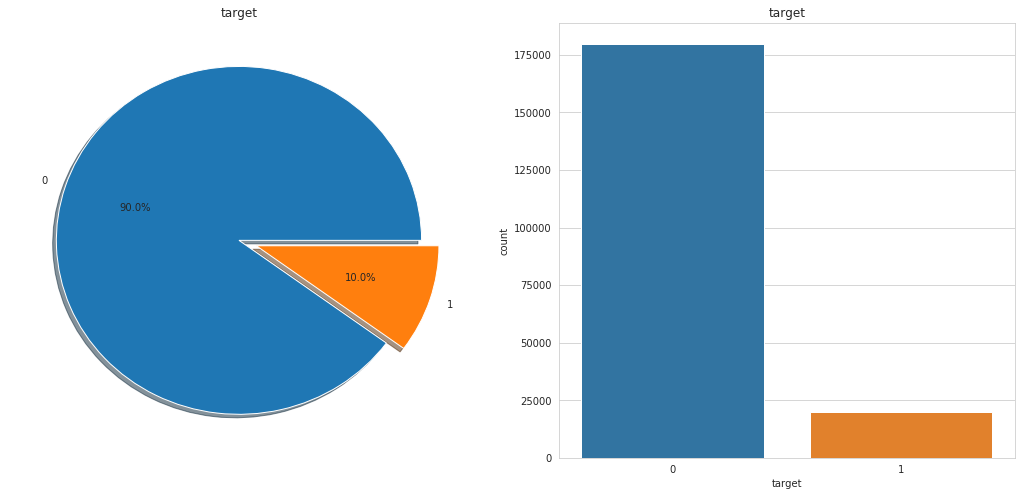

In [56]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['target'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot('target',data=train,ax=ax[1])
ax[1].set_title('target')
plt.show()

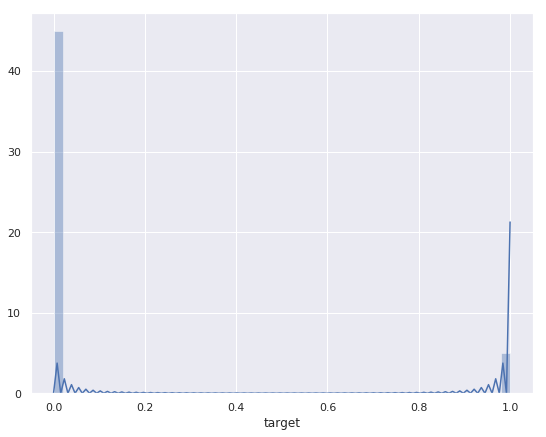

In [57]:
sns.set(rc={'figure.figsize':(9,7)})
sns.distplot(train['target']);

**Inference : Our data is Imbalanced. Hence, we muct proceed accordingly**

# MODEL PREPERATION

### MODEL PROPRETIES :

We will be using logistic regression in combination with xgboost which will be backed by a variation of KFold that returns stratified folds.
A combination of xgboost and lgb model may yeild better yet relatively slight high accuracy. To keep the model simple, xgbm has not been added.
Xgboost has been selected beacause of the unbalanced dataset we posess and also because of sevaral reasons like - can be used to reduce ROC error, hight accuracy, efficiency and performance.


**PROCESSOR USED : **  **GPU** instead CPU to **minimize time complexity** as much as maximum 14 times 




In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
import gc
import xgboost as xgb
import statsmodels.api as sm

pd.set_option('display.max_columns', 200)

In [59]:
train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')

In [60]:
logit_mod = sm.Logit(train['target'], train.iloc[:, 2:])
logit_res = logit_mod.fit(disp=0)
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:               200000
Model:                          Logit   Df Residuals:                   199800
Method:                           MLE   Df Model:                          199
Date:                Mon, 25 Feb 2019   Pseudo R-squ.:                  0.2912
Time:                        00:12:23   Log-Likelihood:                -46234.
converged:                       True   LL-Null:                       -65232.
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
var_0          0.0551      0.003     19.699      0.000       0.050       0.061
var_1          0.0406      0.002     19.068      0.000       0.036       0.045
var_2          0.0658      0.003     20.439      0.0

In [61]:
variables = logit_res.pvalues[logit_res.pvalues < 0.05].index.tolist()
print("total noumber of features in variables array: ")
len(variables)

total noumber of features in variables array: 


178

In [62]:
print('Checking whether graphics card is present or not and displaying its information...\n')
!nvidia-smi

Checking whether graphics card is present or not and displaying its information...

Mon Feb 25 00:12:24 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 396.44                 Driver Version: 396.44                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           On   | 00000000:00:04.0 Off |                    0 |
| N/A   27C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Pr

In [63]:
MAX_TREE_DEPTH = 8
TREE_METHOD = 'gpu_hist'
ITERATIONS = 1000
SUBSAMPLE = 0.6
REGULARIZATION = 0.1
GAMMA = 0.3
POS_WEIGHT = 1
EARLY_STOP = 10

params = {'tree_method': TREE_METHOD, 'max_depth': MAX_TREE_DEPTH, 'alpha': REGULARIZATION,
          'gamma': GAMMA, 'subsample': SUBSAMPLE, 'scale_pos_weight': POS_WEIGHT, 'learning_rate': 0.05, 
          'silent': 1, 'objective':'binary:logistic', 'eval_metric': 'auc',
          'n_gpus': 1}

In [64]:
%%time
nfold = 5
skf = StratifiedKFold(n_splits=nfold, shuffle=True, random_state=2019)

oof = np.zeros(len(train_df))
predictions = np.zeros(len(test_df))

target = 'target'
#predictors = train_df.columns.values.tolist()[2:]

i = 1
for train_index, valid_index in skf.split(train_df[variables], train_df.target.values):
    print("\nRuning fold {} out of {} folds ...".format(i, nfold))
    xg_train = xgb.DMatrix(train_df.iloc[train_index][variables].values,
                           train_df.iloc[train_index][target].values,                           
                           )
    xg_valid = xgb.DMatrix(train_df.iloc[valid_index][variables].values,
                           train_df.iloc[valid_index][target].values,                           
                           )   

    
    clf = xgb.train(params, xg_train, ITERATIONS, evals=[(xg_train, "train"), (xg_valid, "eval")],
                early_stopping_rounds=EARLY_STOP, verbose_eval=False)
    oof[valid_index] = clf.predict(xgb.DMatrix(train_df.iloc[valid_index][variables].values)) 
    
    predictions += clf.predict(xgb.DMatrix(test_df[variables].values)) / nfold
    i = i + 1

print("\nROC AUC SCORE: {:<0.2f}".format(metrics.roc_auc_score(train_df.target.values, oof)))


Runing fold 1 out of 5 folds ...

Runing fold 2 out of 5 folds ...

Runing fold 3 out of 5 folds ...

Runing fold 4 out of 5 folds ...

Runing fold 5 out of 5 folds ...

ROC AUC SCORE: 0.88
CPU times: user 5min 55s, sys: 3min 7s, total: 9min 2s
Wall time: 8min 9s


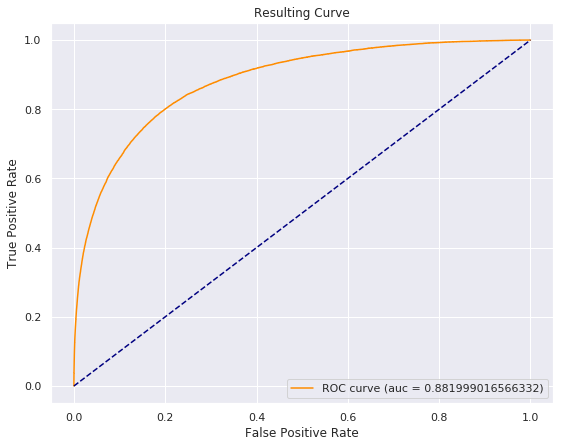

In [65]:
#Dispalying The Resulting ROC Curve
score = metrics.roc_auc_score(train_df.target.values, oof)
fpr, tpr, _  = roc_curve(train_df.target.values, oof)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label=f"ROC curve (auc = {score})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title(f"Resulting Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [67]:
submission = pd.DataFrame({'ID_code': test['ID_code'],
                           'target': predictions})
submission.to_csv('submission.csv', index=False)

In [68]:
submission.head()

,ID_code,target
0,test_0,0.082364
1,test_1,0.214596
2,test_2,0.109132
3,test_3,0.096882
4,test_4,0.034590


In [ ]:
len(submission)